In [45]:
from struct import unpack
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt

from astropy.time import Time
import astropy.units as u

In [3]:
testfile = "/mnt/c/Users/tepic/Desktop/SharpCap Captures/2022-07-27/test/21_54_45.ser"
p = Path(testfile)

In [31]:
"""
the specifications for unpacking SER files are given at: http://www.grischa-hahn.homepage.t-online.de/astro/ser/SER%20Doc%20V3b.pdf
"""

def read_int(fp, endian="<"):
    i = unpack(f"{endian}I", fp.read(4))[0]
    return i

def read_long(fp, endian="<"):
    l = unpack(f"{endian}Q", fp.read(8))[0]
    return l

def read_str(fp, len):
    return fp.read(len).decode().strip()

def parse_time(timestamp):
    return timestamp * 100e-9 * u.second + Time("0001-01-01 00:00:00")

In [62]:
fp = open(p, 'rb')

file_id = read_str(fp, 14)
lu_id = read_int(fp)
color_id = read_int(fp)
endianness = read_int(fp)
im_width = read_int(fp)
im_height = read_int(fp)
bpp = read_int(fp)
nframe = read_int(fp)
observer = read_str(fp, 40)
instrument = read_str(fp, 40)
telescope = read_str(fp, 40)
dateobs = parse_time(read_long(fp))
dateobs_utc = parse_time(read_long(fp))
data_buf = fp.read(nframe * im_width * im_height * bpp // 8)
data_arr = np.frombuffer(data_buf, dtype=np.uint8).reshape((nframe, im_height, im_width))
trailer_buf = fp.read()
time_arr = parse_time(np.frombuffer(trailer_buf, dtype=np.uint64))

fp.close()

/home/tim/conda/envs/py310/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/tim/conda/envs/py310/lib/python3.10/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [47]:
file_id, observer, nframe, bpp, telescope, dateobs

('LUCAM-RECORDER',
 'Observer',
 100,
 8,
 'telescope',
 <Time object: scale='utc' format='iso' value=2022-07-27 21:54:08.679>)

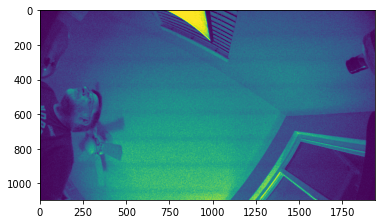

In [63]:
plt.imshow(data_arr[0, :, :])
plt.show()